# Lab 6 & 7c: SVM Multi-Class Classifiation
#### Name:- Sruthi Nayagi 
#### Reg.no:- 19BAI1037 
#### Subject:- Computer Vision in Healthcare Application (CSE4038) 
#### Faculty-In-Charge:- Dr.BALASUNDARAM A
#### Lab Slot:- L27+L28 
#### Date of Submission:- 03/3/2022
#### Dataset Used:- Face expression

## Importing neccessary libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten
from tensorflow.keras.regularizers import l2

## Mounting the drive

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

In [4]:
train_dir = r"C:\Users\LENOVO\Desktop\Datasets\FaceExpressionDataset\train/"
test_dir = r"C:\Users\LENOVO\Desktop\Datasets\FaceExpressionDataset\test/"
train_datagen = ImageDataGenerator(rescale=(1/255.),shear_range = 0.2,zoom_range=0.2,
                                   horizontal_flip=True)
training_set = train_datagen.flow_from_directory(directory = train_dir,target_size=(64,64),
                                                batch_size=32,
                                                class_mode = "sparse")
test_datagen = ImageDataGenerator(rescale=(1/255.))
test_set = test_datagen.flow_from_directory(directory = test_dir,target_size=(64,64),
                                                batch_size=32,
                                                class_mode = "sparse")

Found 28821 images belonging to 7 classes.
Found 2280 images belonging to 7 classes.


# Building the Model

In [5]:
model = Sequential()
model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Flatten())
model.add(Dense(128,activation="relu"))

#Output layer - Multi class 
model.add(Dense(7,kernel_regularizer = l2(0.01),activation= "softmax")) #no_of_classes=7

In [6]:
model.compile(optimizer="adam",loss="squared_hinge", metrics = ['accuracy'])

## Training the model

In [7]:
history = model.fit(x = training_set, validation_data = test_set, epochs=15)

Epoch 1/15
901/901 [==============================] - 114s 126ms/step - loss: 0.3612 - accuracy: 0.1511 - val_loss: 0.3497 - val_accuracy: 0.1088
Epoch 2/15
901/901 [==============================] - 69s 76ms/step - loss: 0.3515 - accuracy: 0.1385 - val_loss: 0.3497 - val_accuracy: 0.10881s - loss: 0.3500 - - ETA: 0s - loss: 0.3515 - accuracy
Epoch 3/15
901/901 [==============================] - 66s 74ms/step - loss: 0.3515 - accuracy: 0.1384 - val_loss: 0.3497 - val_accuracy: 0.1088TA: 14s - loss: 0 - ETA: 12s - loss: 0.352 - ETA: 10s - l - ETA: 7s - loss: 0.352 - ETA: 5s - loss: 0.3524 - accu - ETA: 3s - loss: 0.3517 - accura - ETA: 3s - loss: - ETA: 2s - loss: 0.3514 - 
Epoch 4/15
901/901 [==============================] - 75s 83ms/step - loss: 0.3515 - accuracy: 0.1316 - val_loss: 0.3497 - val_accuracy: 0.1088
Epoch 5/15
901/901 [==============================] - 65s 72ms/step - loss: 0.3515 - accuracy: 0.1222 - val_loss: 0.3497 - val_accuracy: 0.1140: 0.3543 - accuracy: 0.13 - ETA

# Evaluate the model

In [8]:
import matplotlib.pyplot as plt

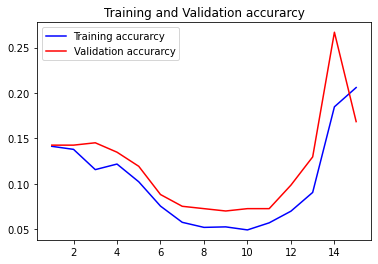

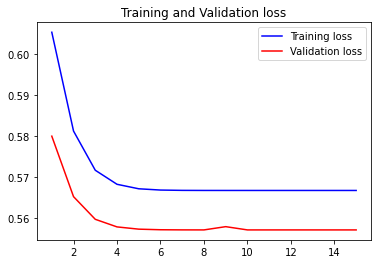

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()

# Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

## Conclusion:
We can see from the above plot that the validation accurarcy increases as the training accuracy increases and the validation accurarcy decreases as the training accuracy decreases. **The overall accuracy of the model is 16%.**